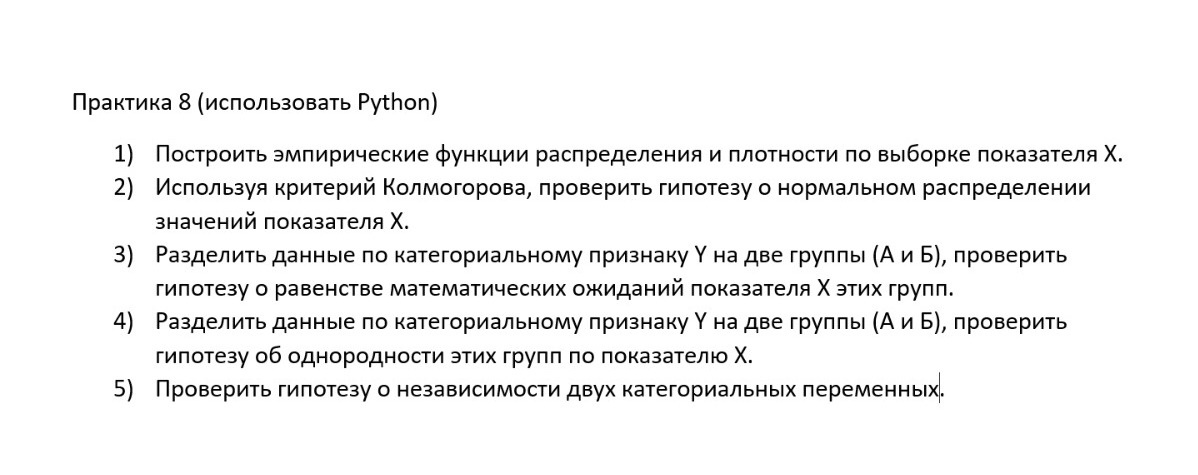

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, ksone
import scipy
import pandas as pd

In [10]:
def f_raspr(xs, samples):
    return np.array([sum(int(s <= x) for s in samples) for x in xs])/len(samples)

In [11]:
df = pd.read_excel('./scoring.xls')

X = df["Доход (тыс. руб.)"]
n = len(X)

X1 = X[df['Недвижимость в собственности (кв.м.)'] == 0]
X2 = X[df['Недвижимость в собственности (кв.м.)'] > 0]
n1 = len(X1)
n2 = len(X2)


xl = np.linspace(0, max(X)+1, 2001)

0.1544125660640523 4.880511993421062 p-value=0.0 Отвергаем
KstestResult(statistic=0.1548793400910402, pvalue=2.1558177883770097e-21, statistic_location=31.0, statistic_sign=1)


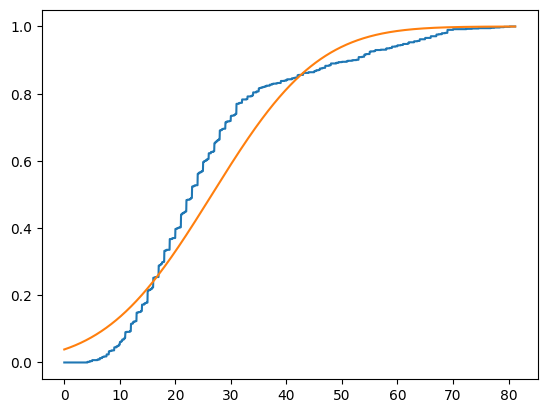

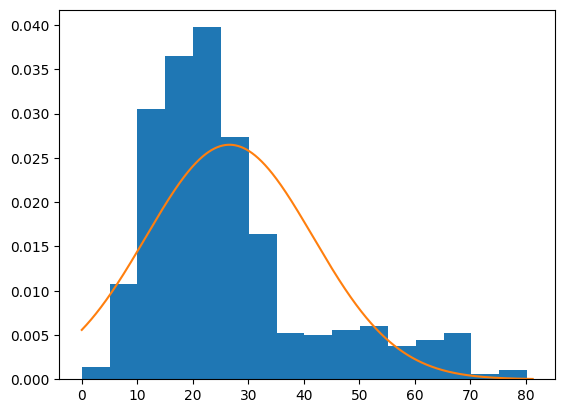

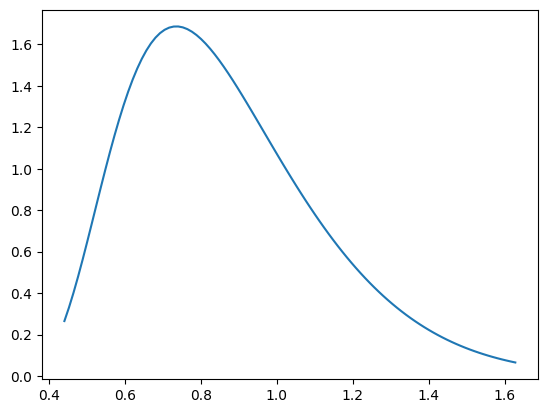

In [18]:
#1, 2
r = f_raspr(xl, X)

xm = np.mean(X)
sig = np.sqrt(np.var(X, ddof=1))

# xm, sig = norm.fit(X)

plt.figure(0)
cdf = norm.cdf(xl, loc=xm, scale=sig)
plt.plot(xl, r)
plt.plot(xl, cdf)

diff = max(abs(r - cdf))
calculated = diff * np.sqrt(n)
print(diff, calculated, f'p-value={1-kstwobign.cdf(calculated)}', 'Отвергаем')

plt.figure(1)
plt.hist(X, density=True, range=(0, X.max()), bins=8*2)
plt.plot(xl, norm.pdf(xl, loc=xm, scale=sig))

plt.figure(2)
lsp = np.linspace(ksone.ppf(0.01, n), ksone.ppf(0.99, n), 100)
plt.plot(lsp, ksone.pdf(lsp, n))


print(scipy.stats.ks_1samp(X, norm.cdf, args=(xm, sig) ))
plt.show()

In [13]:
#3
scipy.stats.ttest_ind(X1, X2, equal_var=False)

TtestResult(statistic=0.20498418514513267, pvalue=0.837628665085173, df=944.1203945466167)

In [14]:
# 4
r1 = f_raspr(xl, X1)
r2 = f_raspr(xl, X2)

diff = max(abs(r1-r2))
calc = np.sqrt( (n1 * n2) / (n1 + n2) ) * diff

print(diff, calc, f'p-value={1-kstwobign.cdf(calc)}', 'Не отвергаем')

print(scipy.stats.ks_2samp(X1, X2))

0.0424204029917849 0.6638690267940449 p-value=0.7702266905531471 Не отвергаем
KstestResult(statistic=0.04242040299178485, pvalue=0.7485684751408628, statistic_location=21.0, statistic_sign=1)
